# BIOS 512 - Final Project
### Cynthia Fisher
### December 7, 2021

## Traumatic Brain Injuries - Overview, trends, and impact on military servicemembers

In [1]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
tbi_age <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_age.csv')
tbi_year <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_year.csv')
tbi_military <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv')



── Column specification ────────────────────────────────────────────────────────
cols(
  age_group = col_character(),
  type = col_character(),
  injury_mechanism = col_character(),
  number_est = col_double(),
  rate_est = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  injury_mechanism = col_character(),
  type = col_character(),
  year = col_double(),
  rate_est = col_double(),
  number_est = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  service = col_character(),
  component = col_character(),
  severity = col_character(),
  diagnosed = col_double(),
  year = col_double()
)




#### This data explores the incidence and impact of brain injuries on individuals. According to the CDC, a traumatic brain injury (TBI) is an injury that affects brain function. TBIs are typically caused by a bump or blow to the head or by a penetrating injury to the head, such as a gunshot wound. It is important to study this topic and further explore the health disparities that exist, specifically the groups that have a higher chance of sustaining a traumatic brain injury. The CDC identified five groups to be at particular risk of TBI including, racial and ethnic minorities, incarcerated individuals, people experiencing homelessness, survivors of domestic violence, and military service members and veterans. This project will focus on traumatic brain injury trends and how TBI impacts military service members. 

In [3]:
tbi_trends = tbi_year %>% group_by(year) %>% 
  summarise(total_number_est = sum(number_est, na.rm = TRUE))

tbi_trends1 = tbi_trends %>% group_by(year) %>% 
  summarise(total = sum(total_number_est)/1000000)

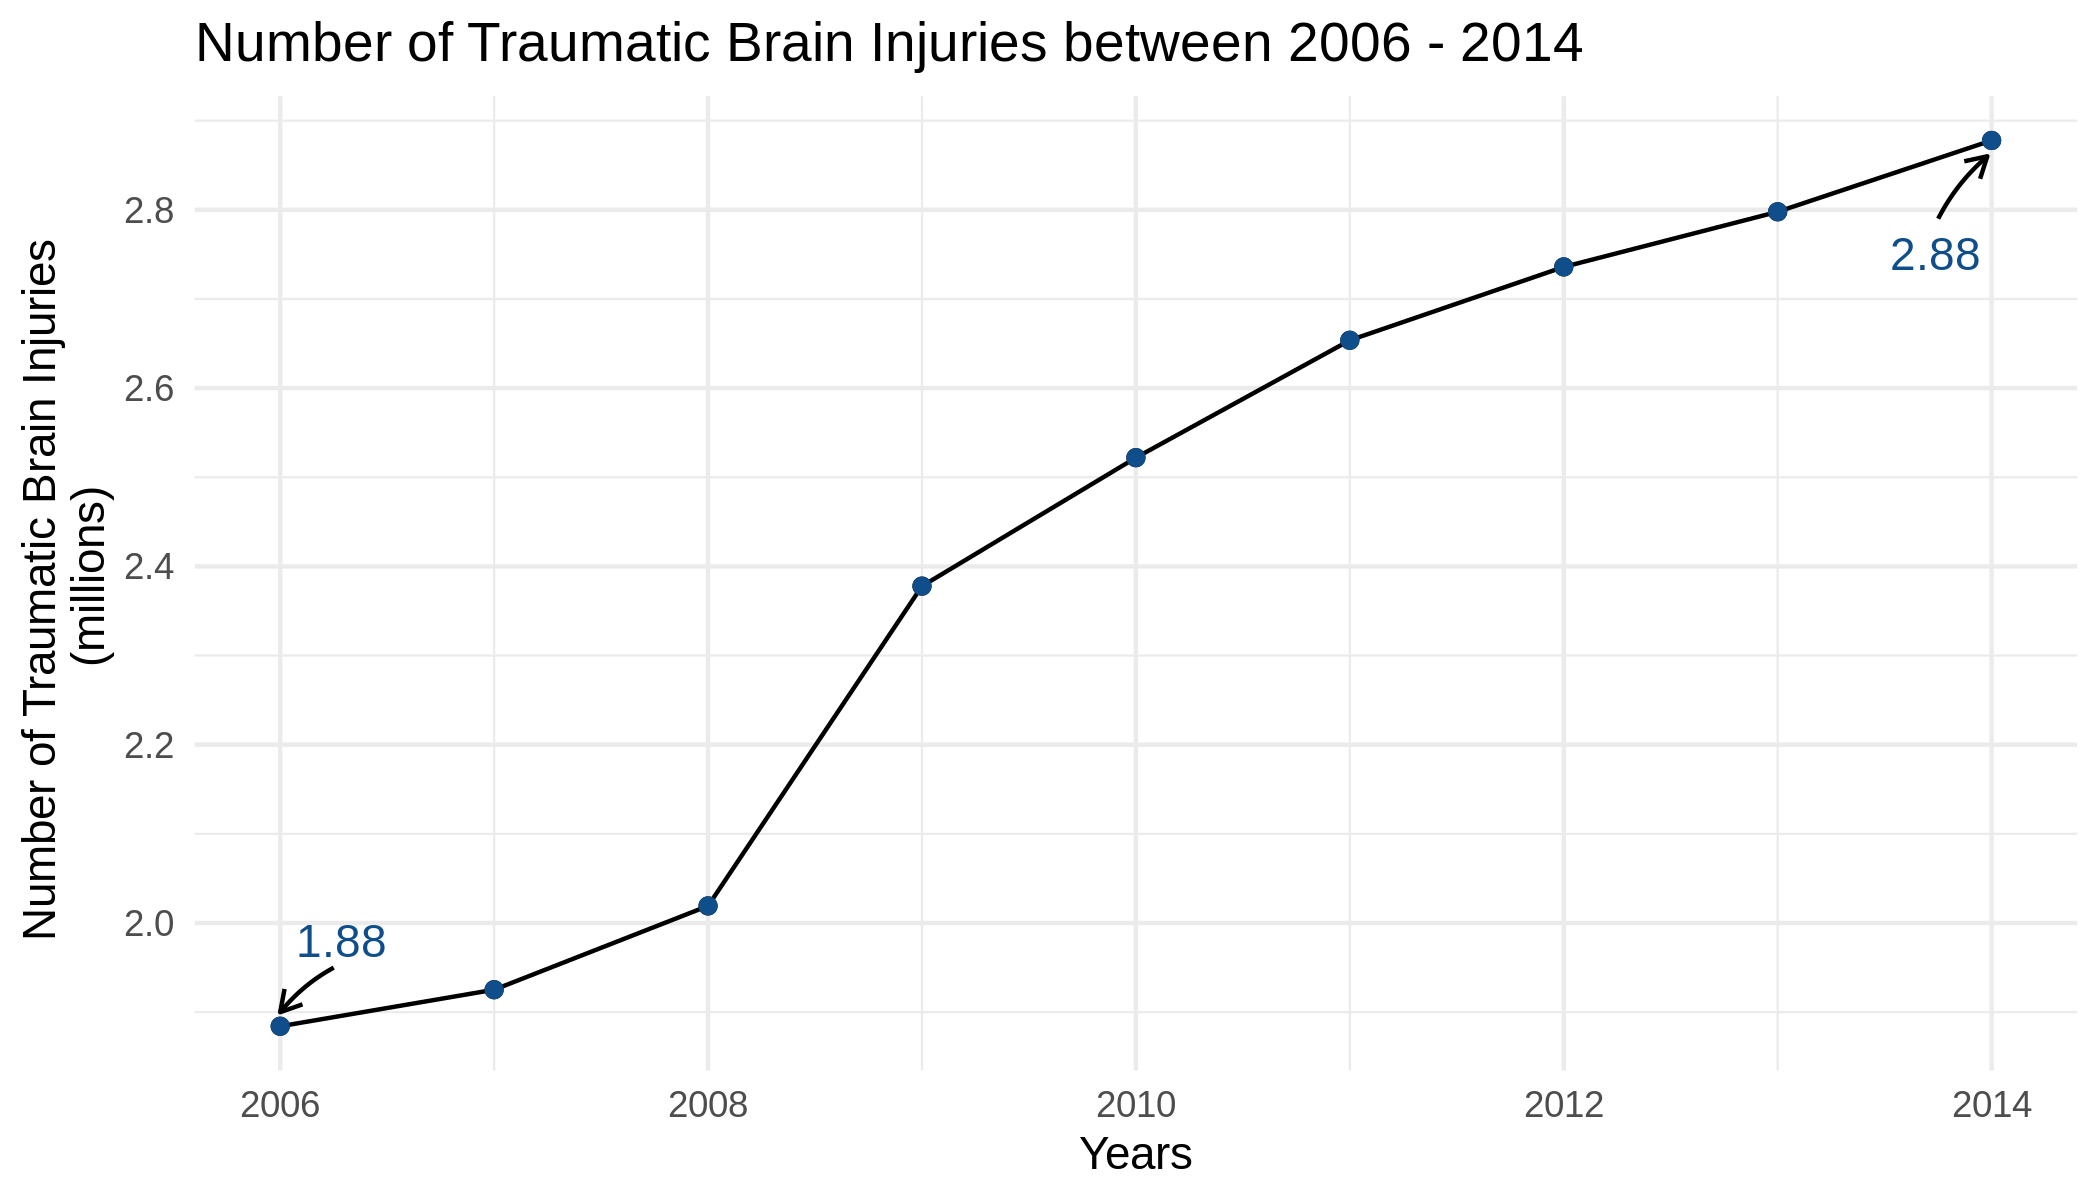

In [4]:
p = ggplot(tbi_trends1, aes(x = year, y = total))

p = p + geom_point() + geom_line()

p = p + geom_point(aes(y=total, x=year), color = "dodgerblue4")

p = p + labs(title = "Number of Traumatic Brain Injuries between 2006 - 2014", 
             y="Number of Traumatic Brain Injuries \n (millions)", 
             x="Years")

p = p + scale_y_continuous(breaks=c(2.0,2.2,2.4,2.6,2.8))

p = p + annotate(geom = "curve",
                 x = 2006.25, 
                 y = 1.95, 
                 xend = 2006, 
                 yend = 1.9, 
                 curvature = .1, 
                 arrow = arrow(length = unit(2, "mm"))) 
p = p + annotate(geom = "text", x = 2006.5, y = 1.98, label = "1.88", hjust = "right", color = "dodgerblue4")

p = p + annotate(geom = "curve",
                 x = 2013.75, 
                 y = 2.79, 
                 xend = 2013.98, 
                 yend = 2.86, 
                 curvature = -.1, 
                 arrow = arrow(length = unit(2, "mm"))) 
p = p + annotate(geom = "text", x = 2013.95, y = 2.75, label = "2.88", hjust = "right", color = "dodgerblue4")

p = p + theme_minimal()

p

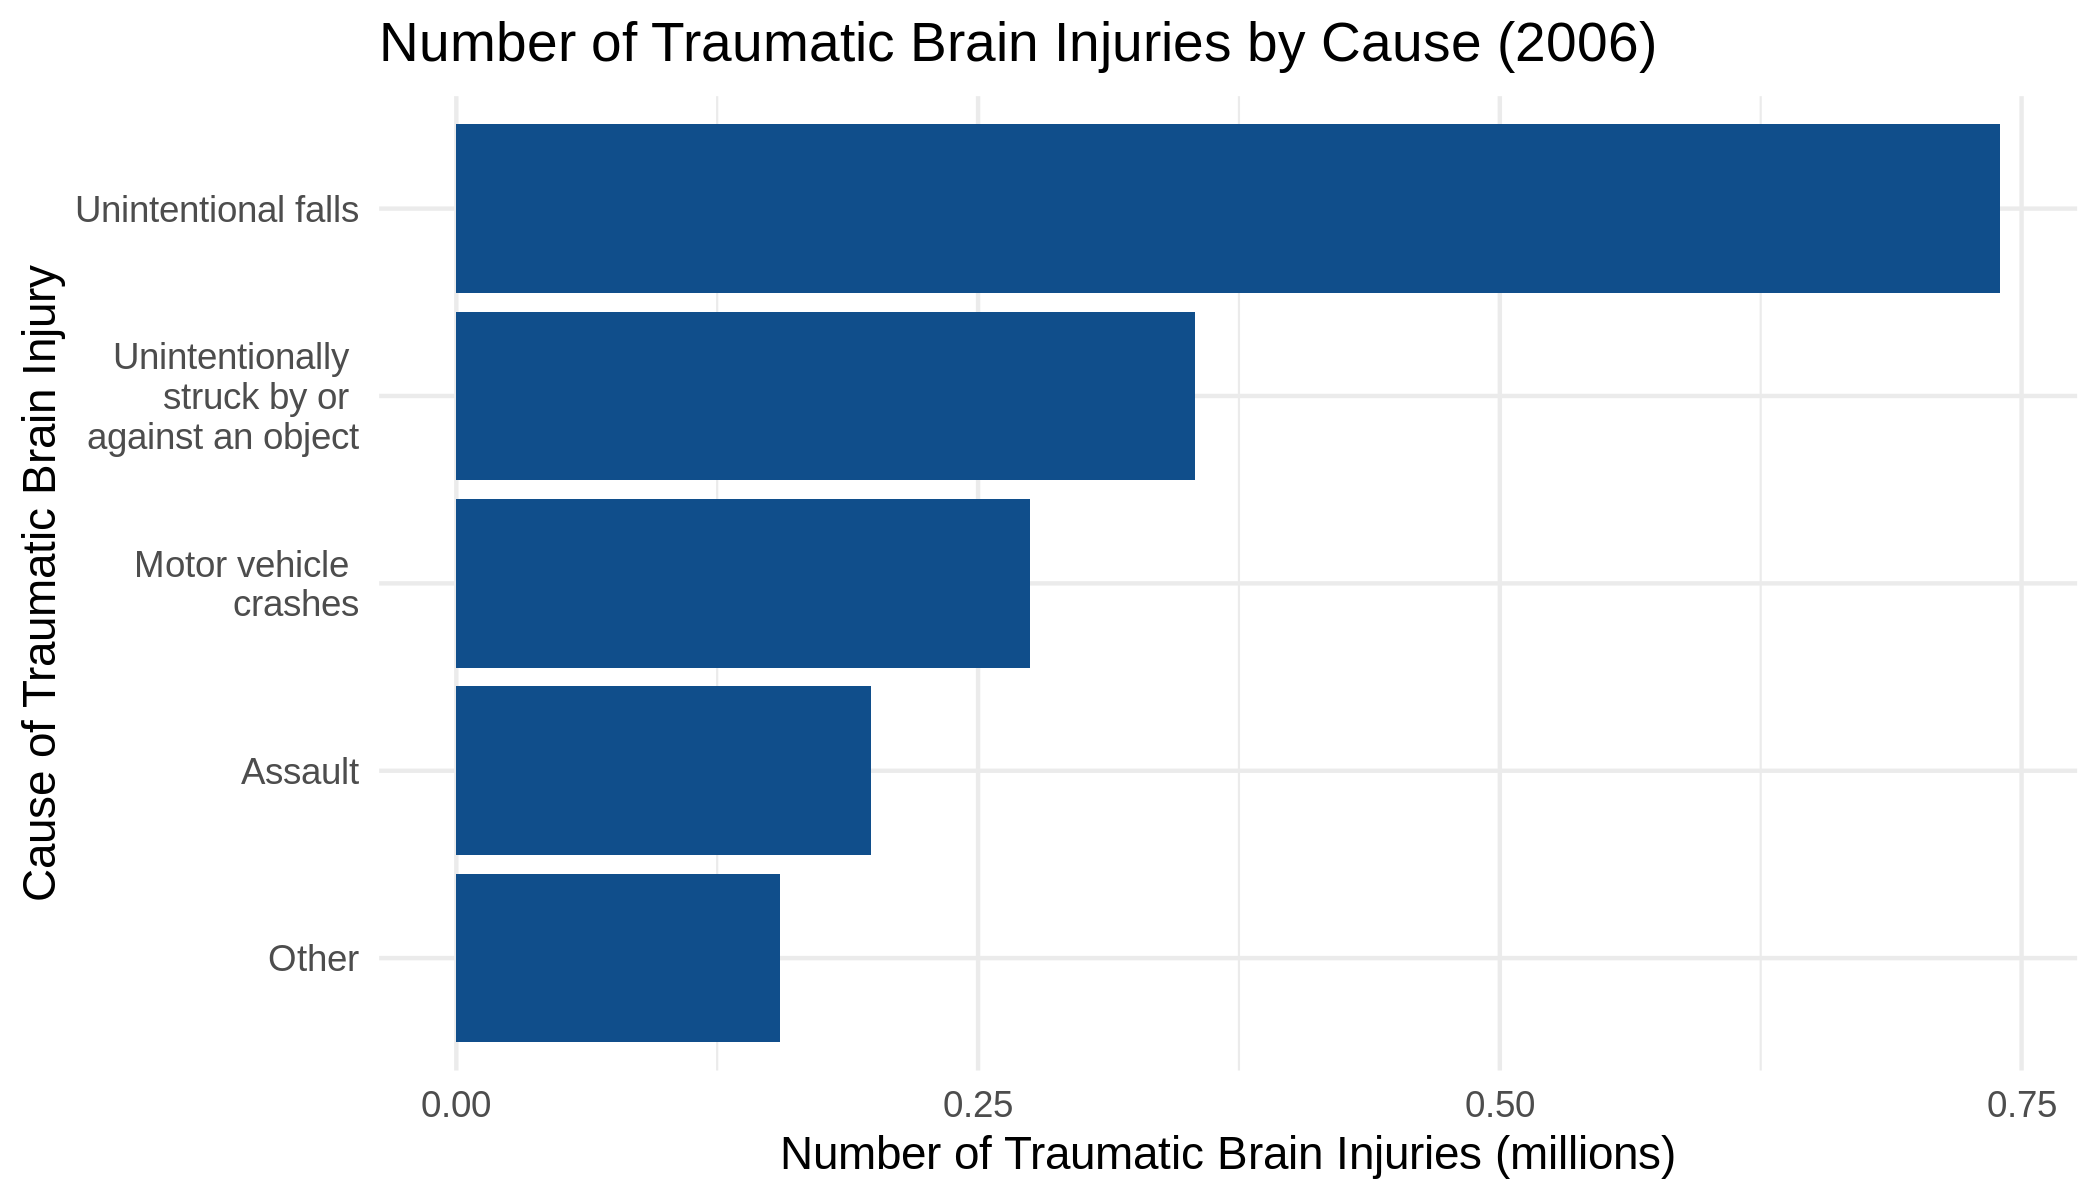

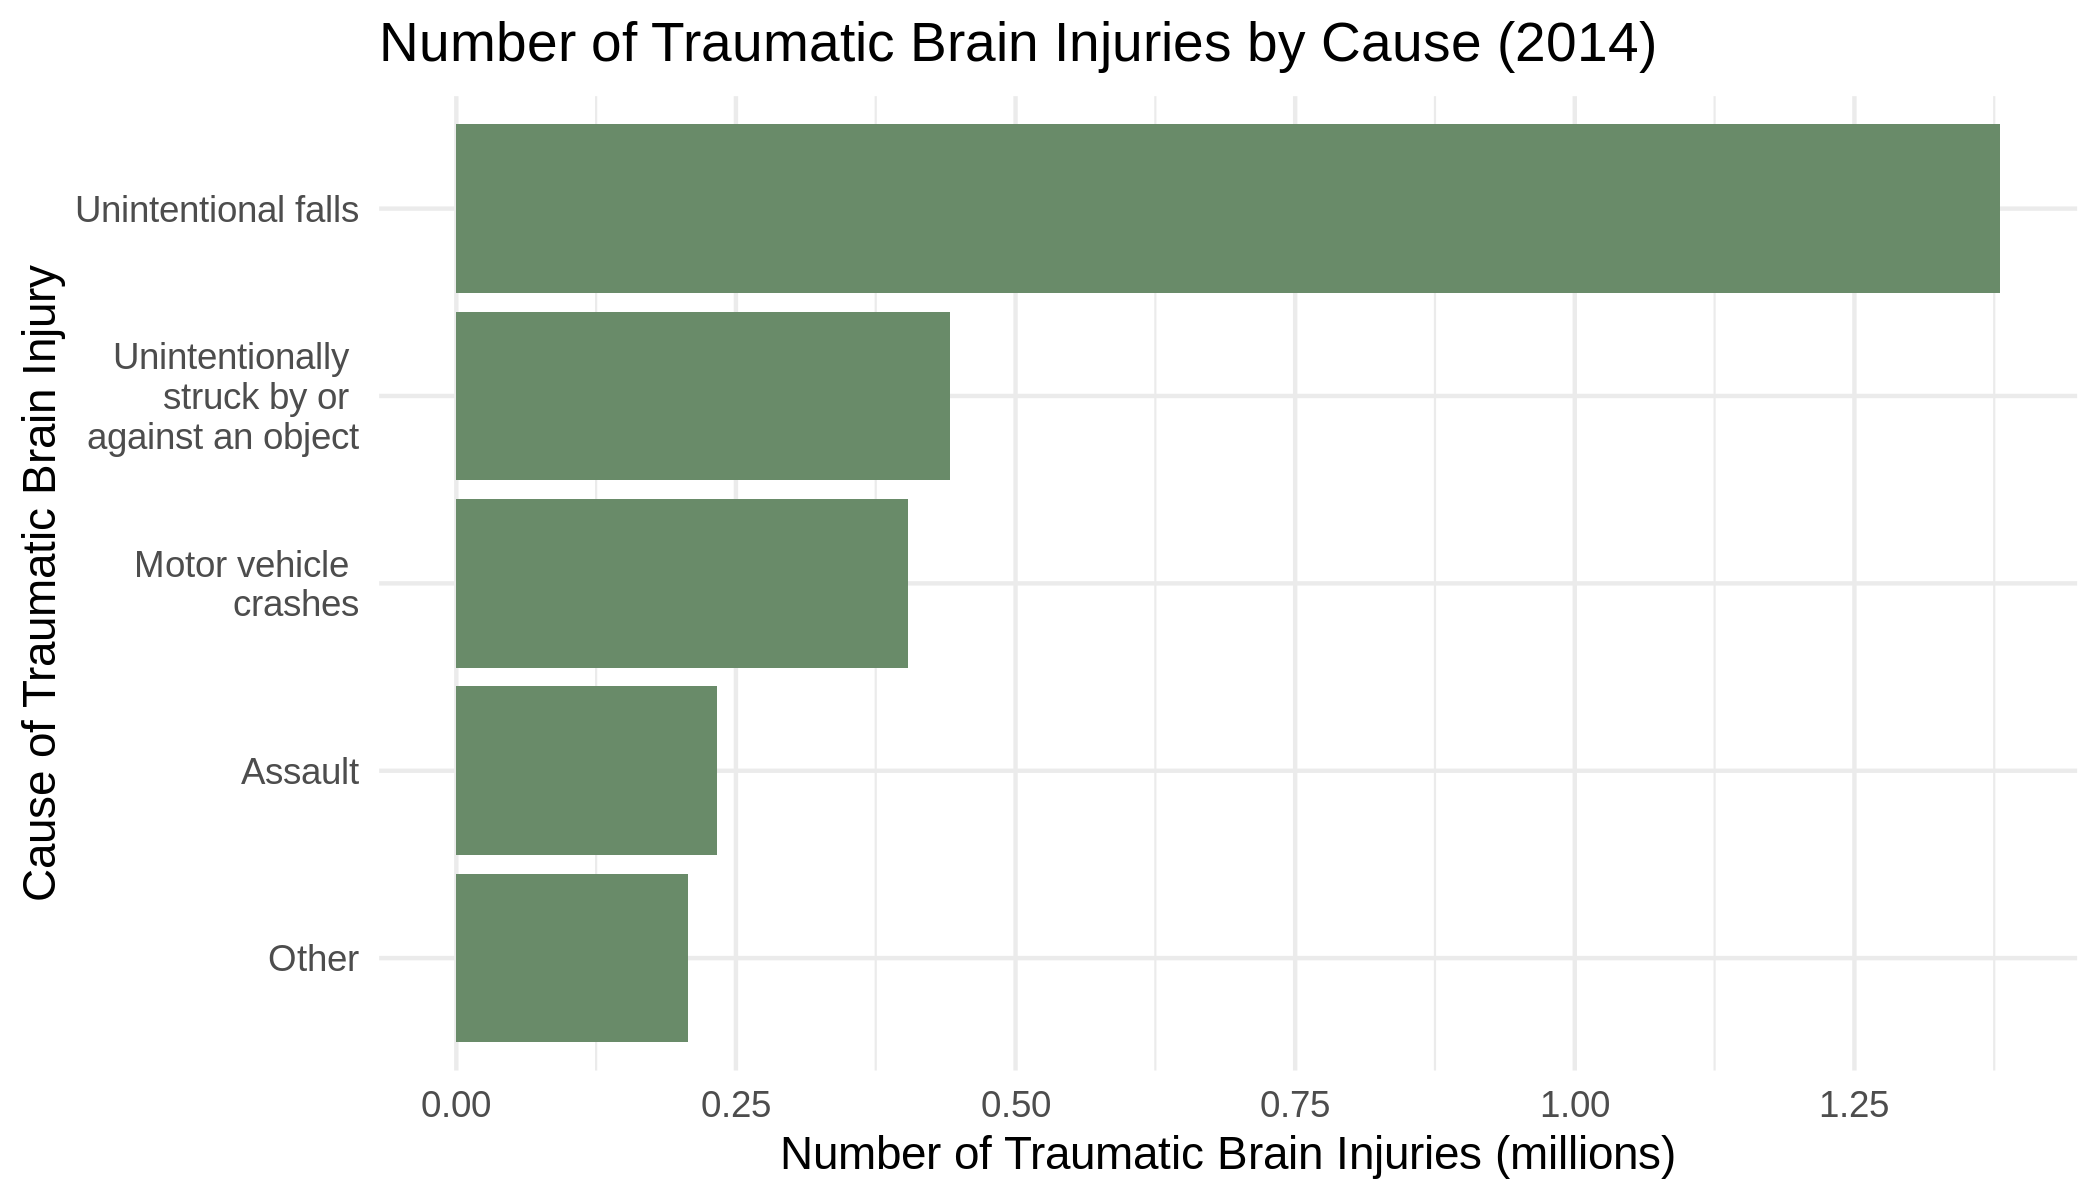

In [5]:
# 2006 Graph
tbi_most2006 = tbi_year %>% filter(year == "2006") %>% group_by(injury_mechanism) %>% 
  summarise(total_number_est = (sum(number_est)/1000000)) %>% 
  top_n(5,total_number_est)

p2006 = ggplot(tbi_most2006 , aes(x=reorder(injury_mechanism, total_number_est), y=total_number_est))

p2006 = p2006 + geom_bar(stat = "identity", fill = "dodgerblue4") + 
    coord_flip() + 
    scale_x_discrete(labels=c("Other", 
                              "Assault",
                              "Motor vehicle \n crashes",
                              "Unintentionally \n struck by or \n against an object",
                              "Unintentional falls"))


p2006 = p2006 + labs(title = "Number of Traumatic Brain Injuries by Cause (2006)", 
             y="Number of Traumatic Brain Injuries (millions)", 
             x="Cause of Traumatic Brain Injury")

p2006 = p2006 + scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1,1.25, 1.5))
p2006 = p2006 + theme_minimal()
p2006


# 2014 Graph
tbi_most2014 = tbi_year %>% filter(year == "2014") %>% group_by(injury_mechanism) %>% 
  summarise(total_number_est = (sum(number_est)/1000000)) %>% 
  top_n(5,total_number_est)

p2014 = ggplot(tbi_most2014 , aes(x=reorder(injury_mechanism, total_number_est), y=total_number_est))

p2014 = p2014 + geom_bar(stat = "identity", fill = "darkseagreen4") + 
    coord_flip() + 
    scale_x_discrete(labels=c("Other", 
                              "Assault",
                              "Motor vehicle \n crashes",
                              "Unintentionally \n struck by or \n against an object",
                              "Unintentional falls"))

p2014 = p2014 + labs(title = "Number of Traumatic Brain Injuries by Cause (2014)", 
             y="Number of Traumatic Brain Injuries (millions)", 
             x="Cause of Traumatic Brain Injury")

p2014 = p2014 + scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1,1.25, 1.5))
p2014 = p2014 + theme_minimal()
p2014

#### The two graphs displayed above illustrate the trends in traumatic brain injuries (TBI) in the United States. The first graph shows the steady increase in the number of TBIs between the years 2006 and 2014. The graph also shows that the annual number of TBIs increased by nearly one million in the 8 years. The second two graph break down the five leading causes of traumatic brain injuries in 2006 and in 2014. In both years, by far the leading cause of traumatic brain injury was unintentional falls. The number of TBIs caused by unintentional falls nearly doubled in the 8 years. The number of TBIs caused by an individual being unintentionally struck by or against an object also increased significantly. However, the number of TBIs caused by motor vehicle crashes and assault remained relatively similar. 

`summarise()` has grouped output by 'service'. You can override using the `.groups` argument.



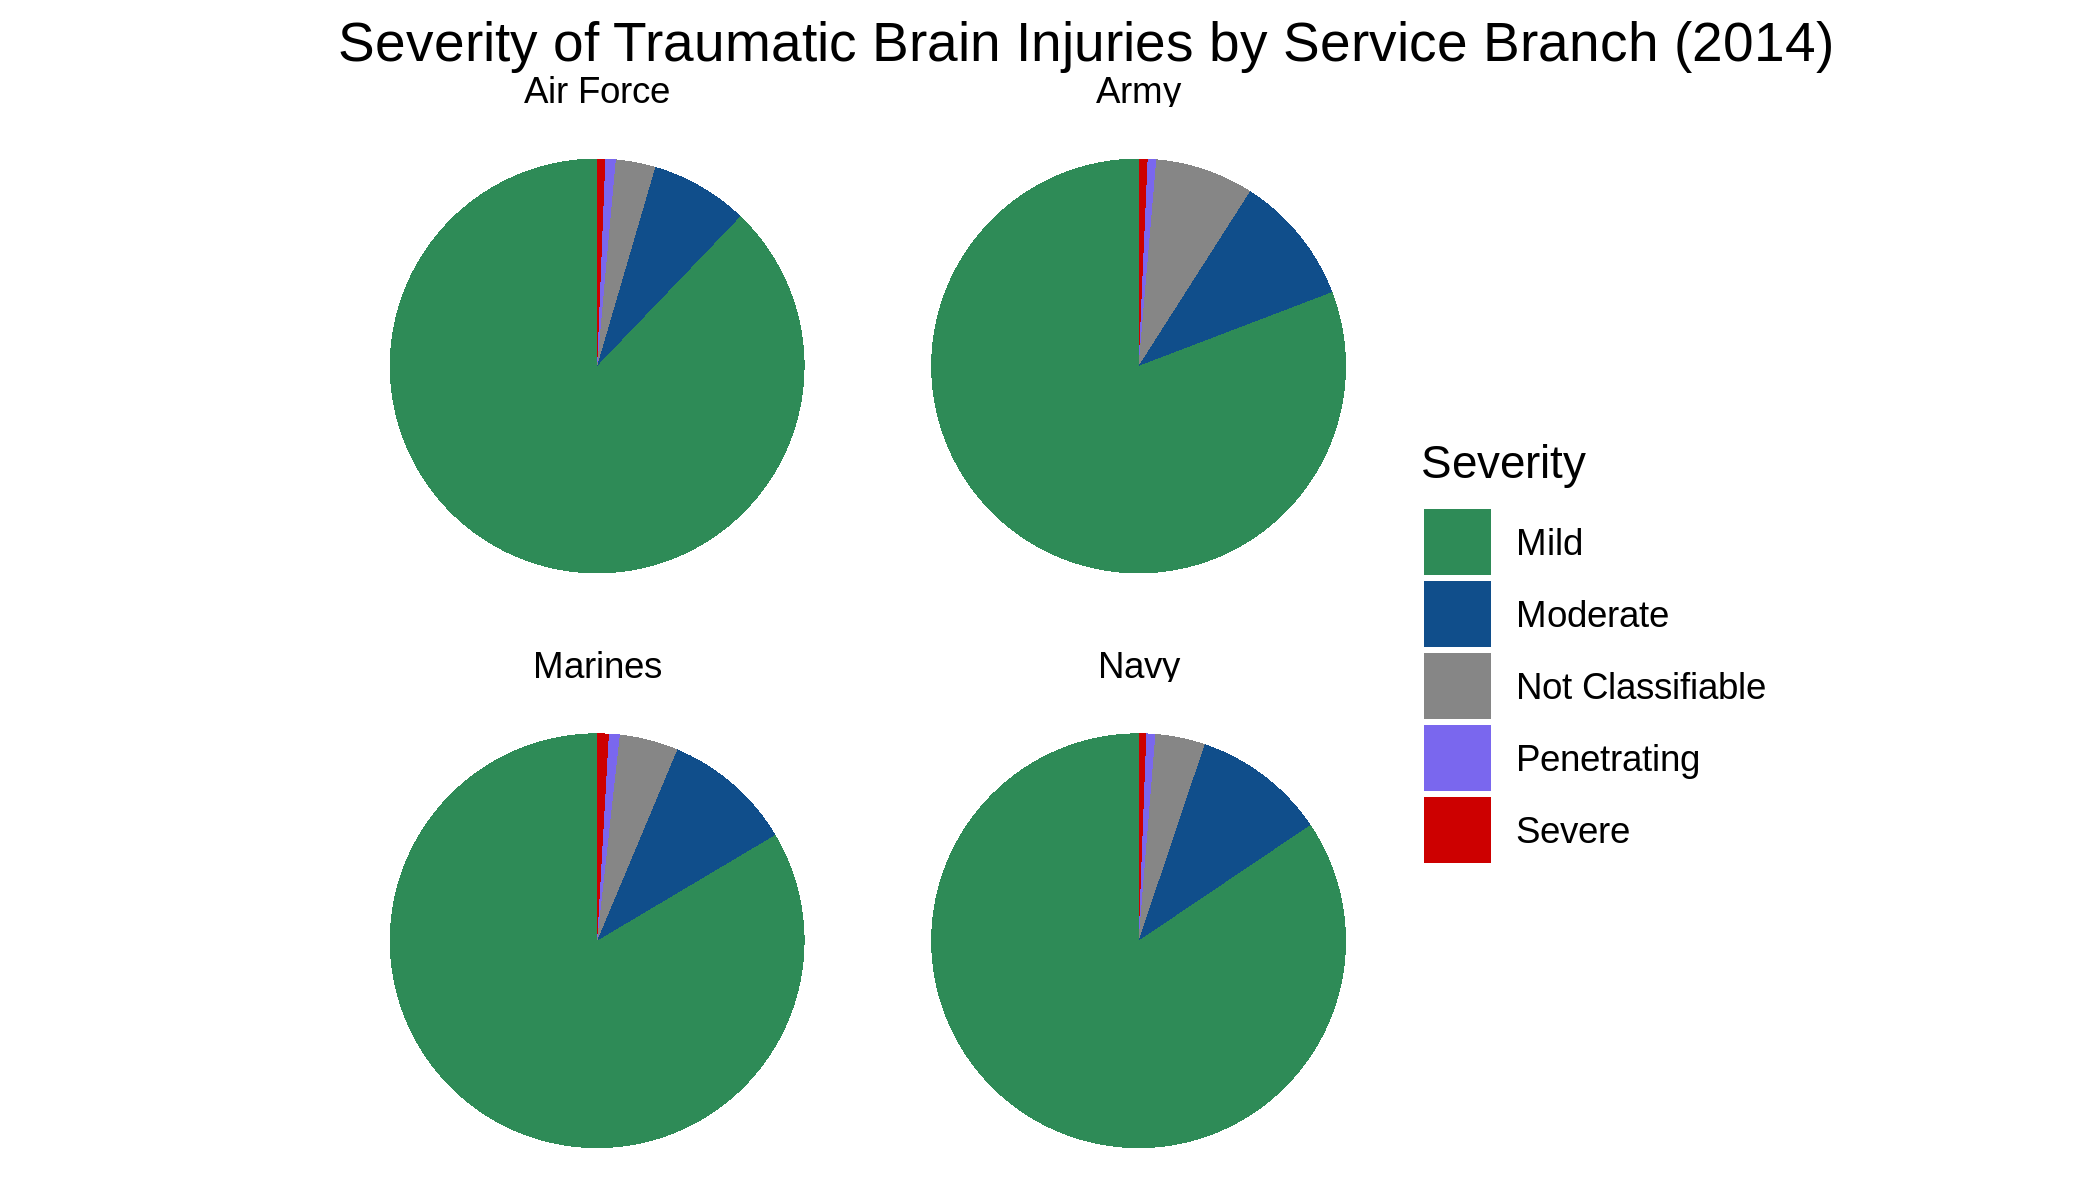

In [6]:
tbi_active_military = tbi_military %>% 
                      filter(component == "Active", year == "2014") %>%
                      group_by(service) %>%
                      summarise(total_diagnosed = sum(diagnosed))

 tbi_final_military <- merge(tbi_military,tbi_active_military,by="service") %>% 
                       filter(component == "Active", year == "2014")%>%
                      group_by(service, severity) %>%
                      summarise(prop_diagnosed = (diagnosed / total_diagnosed))   

mycols <- c("seagreen4", "dodgerblue4", "#868686FF", "slateblue2", "red3")

p = ggplot(tbi_final_military, aes(x = "", y = prop_diagnosed, fill = severity)) 

p = p + geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0)
p = p + scale_fill_manual(values = mycols)

p = p + theme_void()

p = p + labs(title = "Severity of Traumatic Brain Injuries by Service Branch (2014)", 
             fill="Severity")

p = p + facet_wrap(~service)

p

#### According to the CDC, more than 430,000 American military service members were diagnosed with a TBI from 2000 to 2020. Traumatic brain injuries are classified by severity: mild (also known as a concussion), moderate, and severe. These diagnoses vary greatly. A mild TBI is classified as loss of consciousness for less than 30 minutes and normal structural brain imaging. In contrast, a severe TBI is classified as loss of consciousness for more than 24 hours, more than 7 days of post-traumatic amnesia, abnormal structural brain imaging, and other qualifications. This final graphic breaks down the severity of the traumatic brain injuries by military branch. The branches have relatively uniform proportions of TBI severities; the majority of TBIs are mild across all branches. However, with nearly half a million TBIs in 20 years, the seemingly small proportion of severe injuries is actually a significant number of servicemen and women who experienced this devastating injury. There needs to be significant research done to explore the effects of TBIs, particularly severe TBIs, how TBIs relate to PTSD and other service-related health problems, and what can be done now to help those still affected by their past injuries. 